## Lab 1 Part III: Satellite Data
#### 9/7/2022


The following tutorial is the third of three parts of the python portion of Lab 1.  In this part we focus on GOES 16 satellite data images in python using the python modules Siphon and matplotlib.
<br />

### Module Documentation

1. The datetime function from the datetime module: https://docs.python.org/3/library/datetime.html
2. Siphon TDSCatalog: https://unidata.github.io/siphon/latest/examples/Basic_Usage.html
3. Cartoy Feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
4. Matplotlib: https://matplotlib.org/
5. Matplotlib Normalize: https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html


<br /><br />

If you have any questions about the code below always feel free to reach out to me at mpvossen@uwm.edu and I am always willing to further explain the code. <br /> <br />

1. To start creating our satellite plot we first need to import the necessary modules. 
<br />


In [1]:
#this time we want to import everything from the metpy module
import metpy
#from the plotting portion of metpy import the add_timestamp function
from metpy.plots import add_timestamp

#import the crs part of the cartopy module.  This is for geographic parts of the data such as projections
import cartopy.crs as ccrs

#import the feature part of the cartopy module.  This is for things such as state lines
import cartopy.feature as cfeature

#import the pyplot part of the matplotlib module.  This is main python plotting module
import matplotlib.pyplot as plt

#import the datetime feature of the datetime module.  This is for working with dates and times
from datetime import datetime

#from the siphon module, in the catalog part of siphon, import the TDSCatalog class.  This is for accessing data online form a specific type
#of server that is sometime used in atmospheric science called a THREDDS server.  You can think of THREDDS as a website that has a lot of raw data.
from siphon.catalog import TDSCatalog

#from the matplotlib module, in the colors part, import the Normalize function.  This is for adjusting the colors we use to plot the satellite data
from matplotlib.colors import Normalize

#this is for jupyter so it plots the plot within the notebook
%matplotlib inline

<br /><br />
2. Once we have the packages we need we can start by downloading the data we need.  This time we are going to access our satellite data from the Unidata Jumbo THREDDS server using one of the modules we have imported.  The Unidata Jumbo THREDDS server has various meteorological datasets ranging from forecast data such as the latest GFS data to the observations such as the satellite image we are accessing.  Through this THREDDS server we can access both of the IR and visible satellite images we are going to need for this lab.  I will start with the visible image.  <br /><br /> In the code section below, I use the TDSCatalog class to access the THREDDS server.  Then using the response from that server I grab the latest file.  <br /><br /> If you are interested seeing what data you can access at the Unidata Jumbo THREDDS server go to this link.  https://thredds-jumbo.unidata.ucar.edu/thredds/catalog.html
<br />

In [2]:
#this is a string of the url to the THREDDS server that we are going to be using.  This link is specific to the GOES 16 CONUS Visible satellite image
url = "https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/satellite/goes/east/grb/ABI/CONUS/Channel02/current/catalog.xml"
#here we go to the url and get a list of files that are available to us.  I then save the list to the variable sat_catalog
sat_catalog = TDSCatalog(url)

#we want the latest file so we take our list of files (sat_catalog), get the online locations of the data (.datasets) for specifically the latest file ([0]), and save it to the variable sat_file_name.  
#The list generated before is ordered based on how old the data is, with the newest file being index 0 and the oldest being the last index. 
sat_file_name = sat_catalog.datasets[0]

#now that we have the location of the file, let's open it.  We take the location from before (sat_file_name) and use the remote_access feature This is a special way of opening a file over the internet.  
#Here Here we never download the file, but rather the information goes directly to the memory (RAM) which keeps your file space clean and makes your code faster.
#We also use a package called xarray to open the data from the memory
sat_data = sat_file_name.remote_access(use_xarray=True)

#display the sat_data dataset.  Notice that an xarray dataset is displayed below.  I'll discuss more about it in the cell below.
sat_data

<xarray.Dataset>
Dimensions:                                           (y: 6000, x: 10000, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1, num_star_looks: 24)
Coordinates:
  * y                                                 (y) float32 0.1282 ... ...
  * x                                                 (x) float32 -0.1014 ......
    t                                                 datetime64[ns] ...
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_id                                           (band) int8 ...
    band_wavelength                                   (band) float32 ...
    t_star_look                                       (num_star_looks) datetime64[ns] ...
    band_wavelength_star_look                         (num_star_looks) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band, num_star_looks
Data variables: (12/37)
    Rad                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    algorithm_dynamic_input_data_container            int32 ...
    processing_parm_version_container                 int32 ...
    algorithm_product_version_container               int32 ...
    star_id                                           (num_star_looks) float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/34)
    _NCProperties:                         version=1|netcdflibversion=4.4.1.1...
    naming_authority:                      gov.nesdis.noaa
    Conventions:                           CF-1.7
    Metadata_Conventions:                  Unidata Dataset Discovery v1.0
    standard_name_vocabulary:              CF Standard Name Table (v35, 20 Ju...
    institution:                           DOC/NOAA/NESDIS > U.S. Department ...
    ...                                    ...
    time_coverage_end:                     2022-09-10T01:03:54.4Z
    LUT_Filenames:                         SpaceLookParams(FM1A_CDRL79RevP_PR...
    cspp_geo_grb_version:                  CSPP Geo GRB v1.0.25
    cspp_geo_grb_production_host:          ingest.unidata.ucar.edu
    history:                               2022-09-10, 01:04:02, ldm, /usr/lo...
    cspp_geo_grb_reconstruction_end_time:  2022-09-10 01:04:02.105945

<br /><br />
3.  Now the satellite dataset is open.  Above you should see a list of coordinates and data variable.  The satellite data is structed that there is coordinate variables that tell you things such as x pixel position, y pixel position, and time.  There are also data variables, these are things like brightness of our visible satellite at the location that corresponds with our x pixel position and y pixel position.  Finally, there is attribute data, which is just extra information on what the data is. <br /><br /> In it's current format the satellite data is not in a form that we can plot with geographic data such as state lines and country lines, so we need to do some data wrangling to get it there.  Luckily metpy has written this code for us.  Here I use metpy's parsing code to get "Rad" variable.  In this file the "Rad" variable or the radiance variable, is what contains our visible light brightness value.<br />

In [3]:
#for the satellite data (sat_data), using metpy (.metpy) parse out the satellite file (.parse_cf()) specifically for the radiance variable ('Rad')
data = sat_data.metpy.parse_cf('Rad')

<br /><br />
4.  Next we need to get the specific projection that we are plotting the data in.  We can get this directly from the file from the attribute variables.  Projections will be discussed during the lecture the week of Sept. 12th. <br />

In [4]:
#from the parsed data file (data) use metpy (.metpy) to parse the data and get the cartopy_crs attribute variable.  Cartopy_crs is the variable that contains the 
#map projection that the data is designed for.  Outside of satellite data the map projection variable name may be a different name.
proj = data.metpy.cartopy_crs

<br /><br />
5. Now we will pull out our x and y coordinate variable from our data.  This will simply how we set the extent of the plot later. <br />

In [5]:
#from the parsed data file (data) pull out the variable x ([x]).  This is the x location of each point contained in the radiance variable
x = data['x']
#from the parsed data file (data) pull out the variable y ([t]).  This is the y location of each point contained in the radiance variable
y = data['y']

<br /> <br />
6. Here I set up the colors our image will be plotted in.  First I set the range of brightness values that we want to plot.  Here I choose -25 as a minimum value and the maximum radiance value in the data as the maximum value.  The lowest value you can have of visible radiances is 0, but I chose -25 to shift the color table down and make the land more visible.  <br /><br />  Here I also set the color map to the color map gist_yarg_r.  This color map is the reversed version of the gist_yarg color map defined by the matplotlib module.  I reverse the colormap because in it's original form, the color map makes low brightness white and high brightness black and so we want that colormap flipped.   <br /><br />To see what this colormap looks like and to see the other color maps available go to https://matplotlib.org/stable/tutorials/colors/colormaps.html <br />

In [6]:
#set the range that the color table should cover.  Normalize(vmin = minimum color value, vmax= maximum color value)
color_range = Normalize(vmin=-25, vmax=data.max())

#set the matplotlib color map
color_map = 'gist_yarg_r'

<br /><br />
7. We are now ready to plot our satellite data.  Since all plotting code must be in one cell in Jupyter Notebooks, I will explain what I'm doing in the comments.  <br />

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iterati

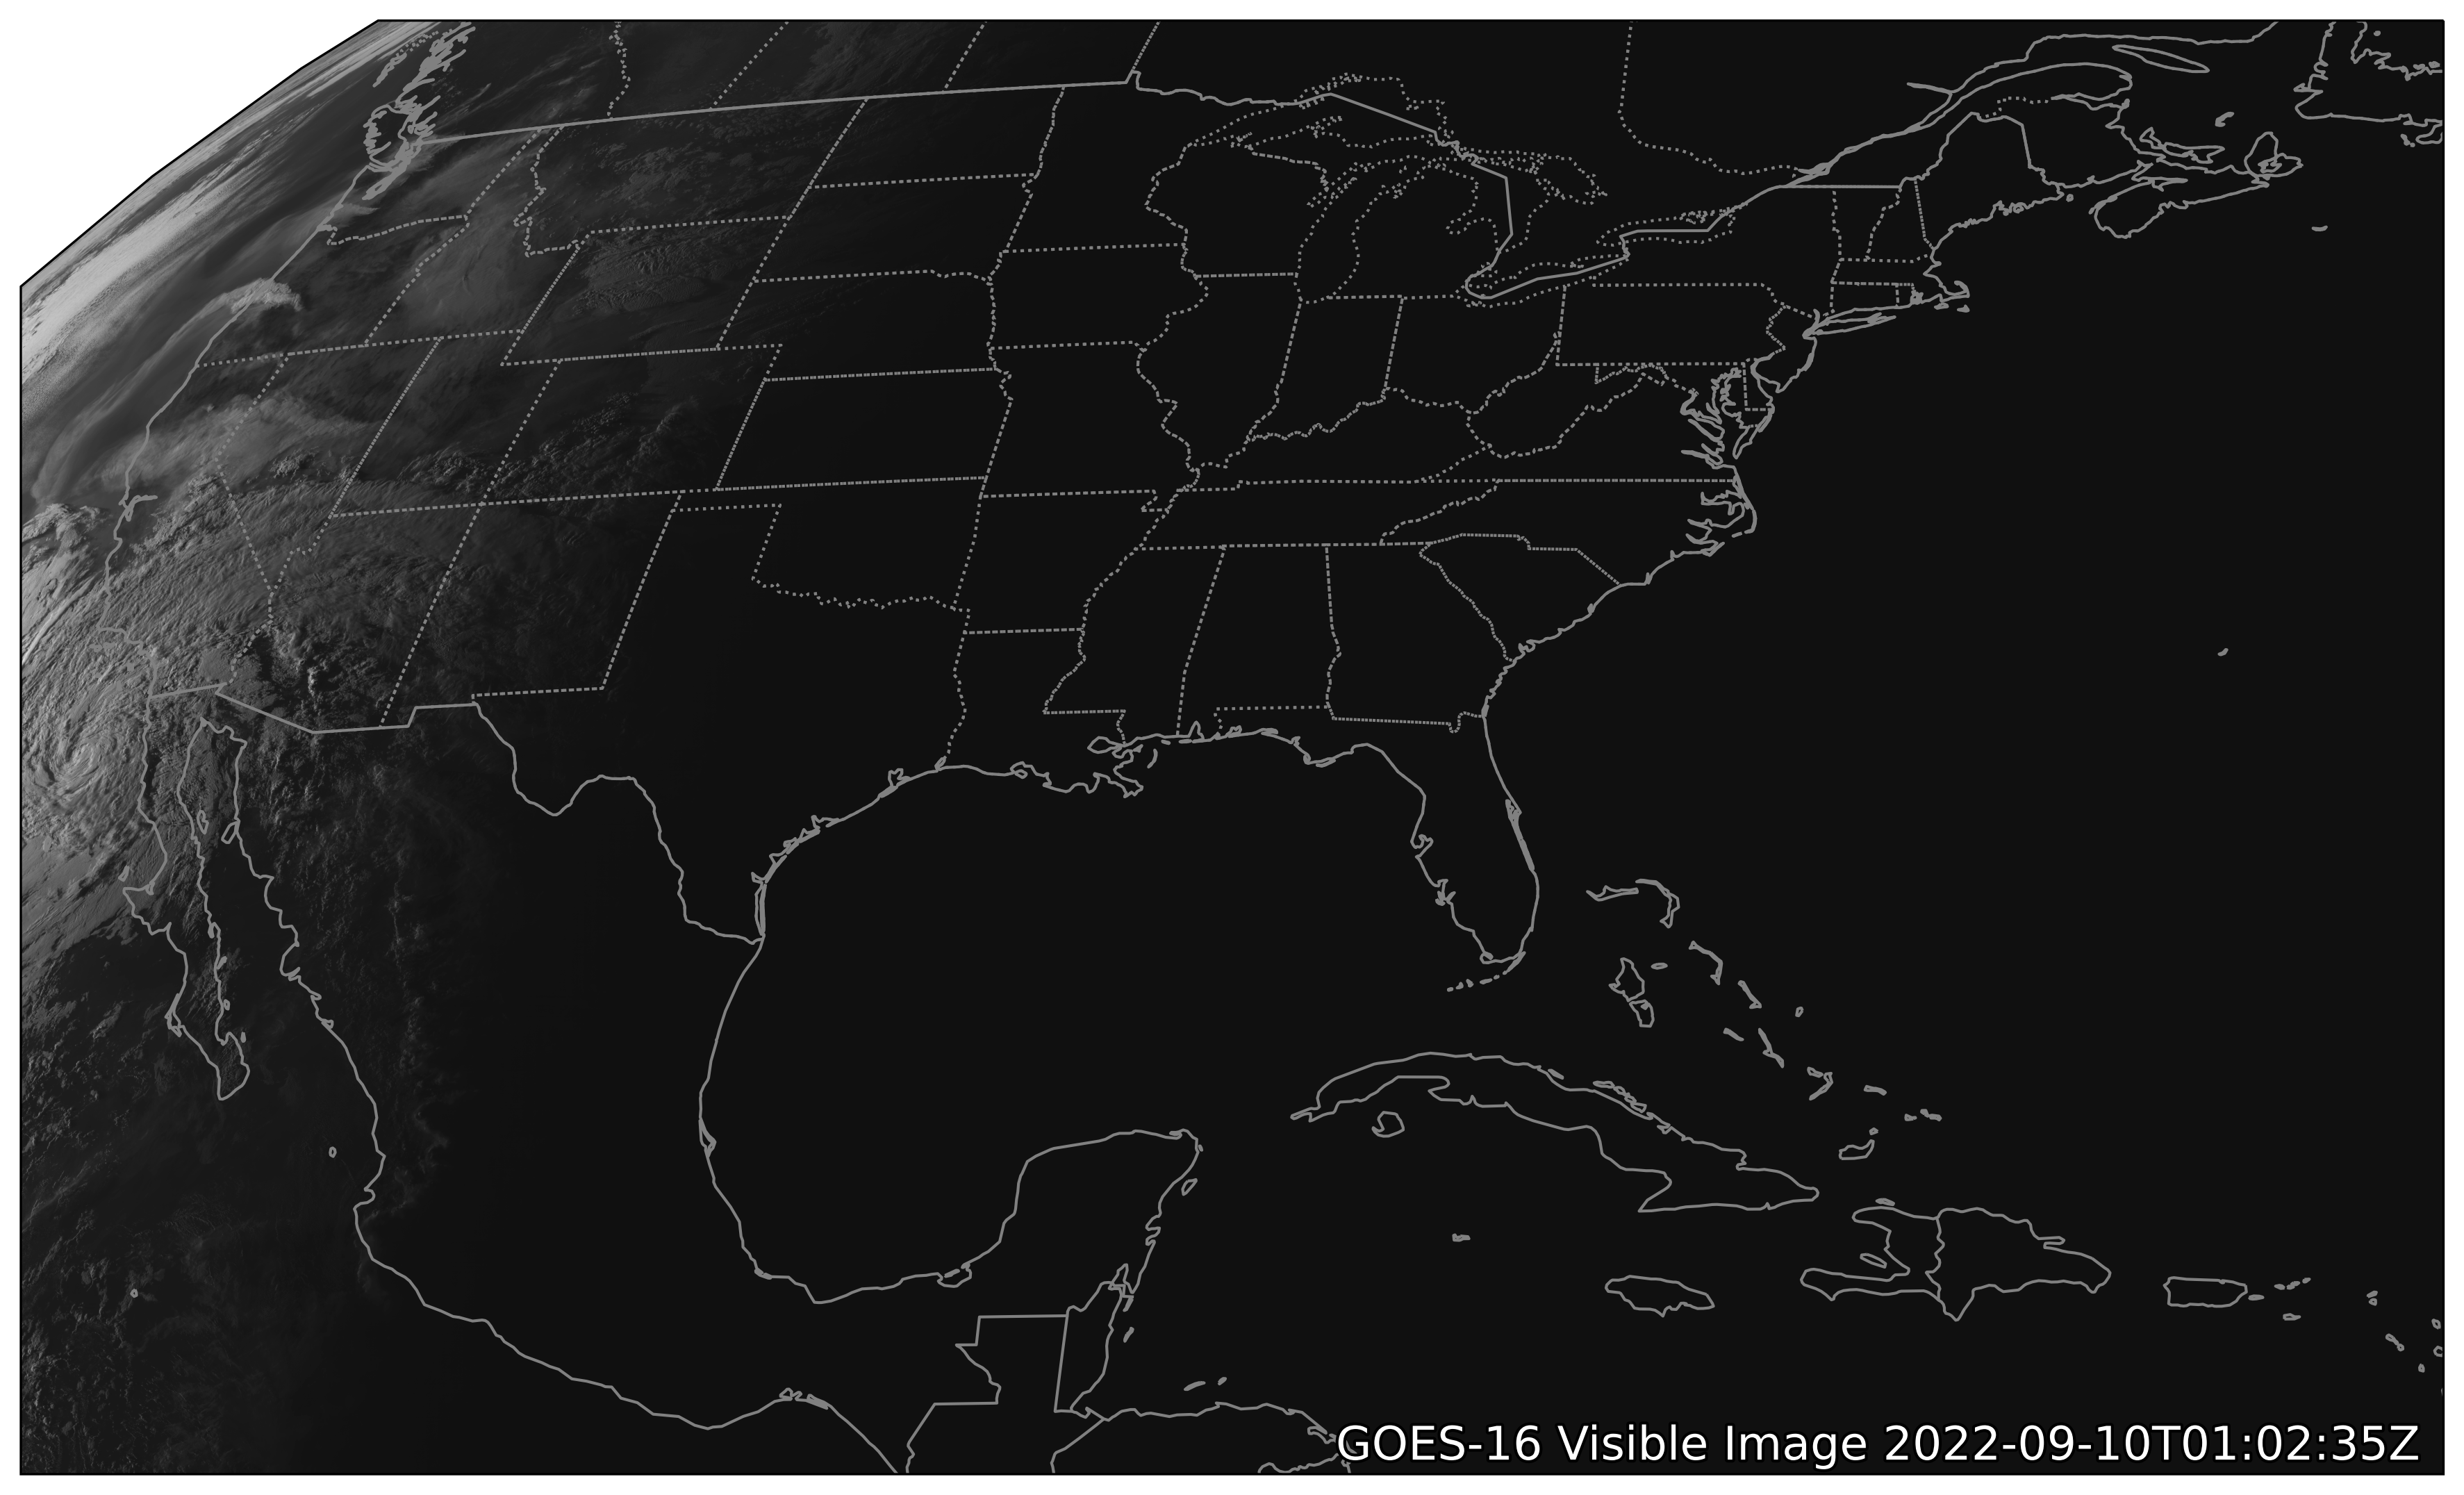

In [7]:
#here I create the figure.  Think of it as the sheet of paper that you are going to draw the map on. 
#I set the figure size to be 1500px X 1500 px and I set the resolution (dpi) to 300 dots per square inch.  A figure dpi of 300 is standard for publications.
#plt.figure(figsize = (the size of the figure), dpi = the figure resolution)
fig = plt.figure(figsize=(15, 15), dpi=300)

#We now need to set what projection we are plotting our map on.  Here we pass on the data we parsed out before.
#this function allows us to have multiple maps with plots in our figure but here we only need 1.
#fig.add_subplot(# plot rows, # plot columns, the current plot id, projection = the map projection for the plot)
#the function outputs a blank map plot which I save to ax.
ax = fig.add_subplot(1, 1, 1, projection=proj)

#We now need reference data to know where exactly the clouds are.  Here I add the coastlines, states, and country boarders.  
#I also specify that I want the various boarders to have a resolution of 50 meters, with a linewidth of 1, and a line color of grey.  Line color is called edgecolor here 
#because it is possible to fill the entire area that is within the boarder with a color.
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1, edgecolor = 'grey')
#for the states to make them stand out, I used the dotted linestyle
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':',linewidth = 1, edgecolor='grey')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='grey')

#this is the actual plot function for the satellite data. (.imshow)
#we pass the satellite dataset in.  It can find the variables it needs within the dataset.  
#We also set to extent to be the full extent.  If this wasn't here, there would be extra area in the map that we don't have an image for
#We also pass what colormap we want and what range that color map should be set to.  We set this up earlier
im = ax.imshow(data, extent=(x.min(), x.max(), y.min(), y.max()), origin='upper', cmap=color_map, norm=color_range)

#This next line gets the time that the satellite image is valid for from the data file.  This is setup to parse the date in the format it is in, in the datafile.
#datetime.strptime is used for parsing the datetime.  The datetime I pass in comes from the satellite data (data), and I tell python to take out the time variable (.t) 
#and then get the value contained in that variable (.values).  I then use the string function to make sure the time variable is a string so the datetime parser can work and I remove the last three characters since
#satellite data has a very actuate time stamp that has the seconds to 9 decimal places.  Python can only handle 6 decimal places and thus we just get rid of the last three decimal places.
start_time = datetime.strptime(str(data.t.values)[:-3], 
                               '%Y-%m-%dT%H:%M:%S.%f') #this tells the function how to decode the datetime.  Each % then the letter after, tells the function what 
                                                       #number of the date is located in that part of the string we are decoding the datetime for.  See Lab 1 appendix
                                                       #for what each % and letter combination stands for

#I now insert the time the satellite image is valid for into the image
#add_timestep(the plot variable, the datetime that the image is for, extra information for before the timestamp, should the text coloring be high contract, font size, vertical position of the text in the plot)

add_timestamp(ax, time=start_time, pretext='GOES-16 Visible Image ',
              high_contrast=True, fontsize=16, y=0.01)

#finally I tell python to display the image created.
plt.show()

<br /><br />
8. Now let create the infrared satellite imagery.  Below I download the latest satellite image again for you the same way I did above for the visible image.  Note that the color map range has changed now to 10 and 150 Wm<sup>-2</sup>.  Raw satellite data like we are working with is always measured in radiances and the imagery we normally see in websites for infrared imagery is a temperature that was derived from the measured radiances.

In [8]:
#this is the url to the THREDDS server that we are going to be using.  This link is specific to the GOES 16 CONUS Visible satellite image
url = "https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/satellite/goes/east/grb/ABI/CONUS/Channel13/current/catalog.xml"
#here we go to the url and see what satellite images are available to us
sat_catalog = TDSCatalog(url)

#we want the latest file so we select the first file (index 0)
sat_file_name = sat_catalog.datasets[0]

#now that we have the name of the file, let's open it.  This is a special way of opening a file over the internet.  Here we never download the file, but rather
#the information goes directly to the memory.
#We also use a package called xarray to open the data from the memory
sat_data = sat_file_name.remote_access(use_xarray=True)

#parse the satellite data
data = sat_data.metpy.parse_cf('Rad')

#get the projection
proj = data.metpy.cartopy_crs

#pull out the x and y coordinates
x = data['x']
y = data['y']

#set color range
color_range = Normalize(vmin=10, vmax=150)



<br /><br />
9. In the section below, using the reference I gave in Part II section 6 of this tutorial, choose a white to black or black to white colormap other than gist_yarg for your image.  Since are working with IR imagery be sure to choose a color map with low values being white and high values being black.  <br /><br />Note: You can flip color maps by adding _r to the end of their name. <br />

In [9]:
color_map = 'gray_r'

<br /><br />
10. Now we create the plot again.  In the code below change the time stamp text so it says infrared image rather than visible <br />

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


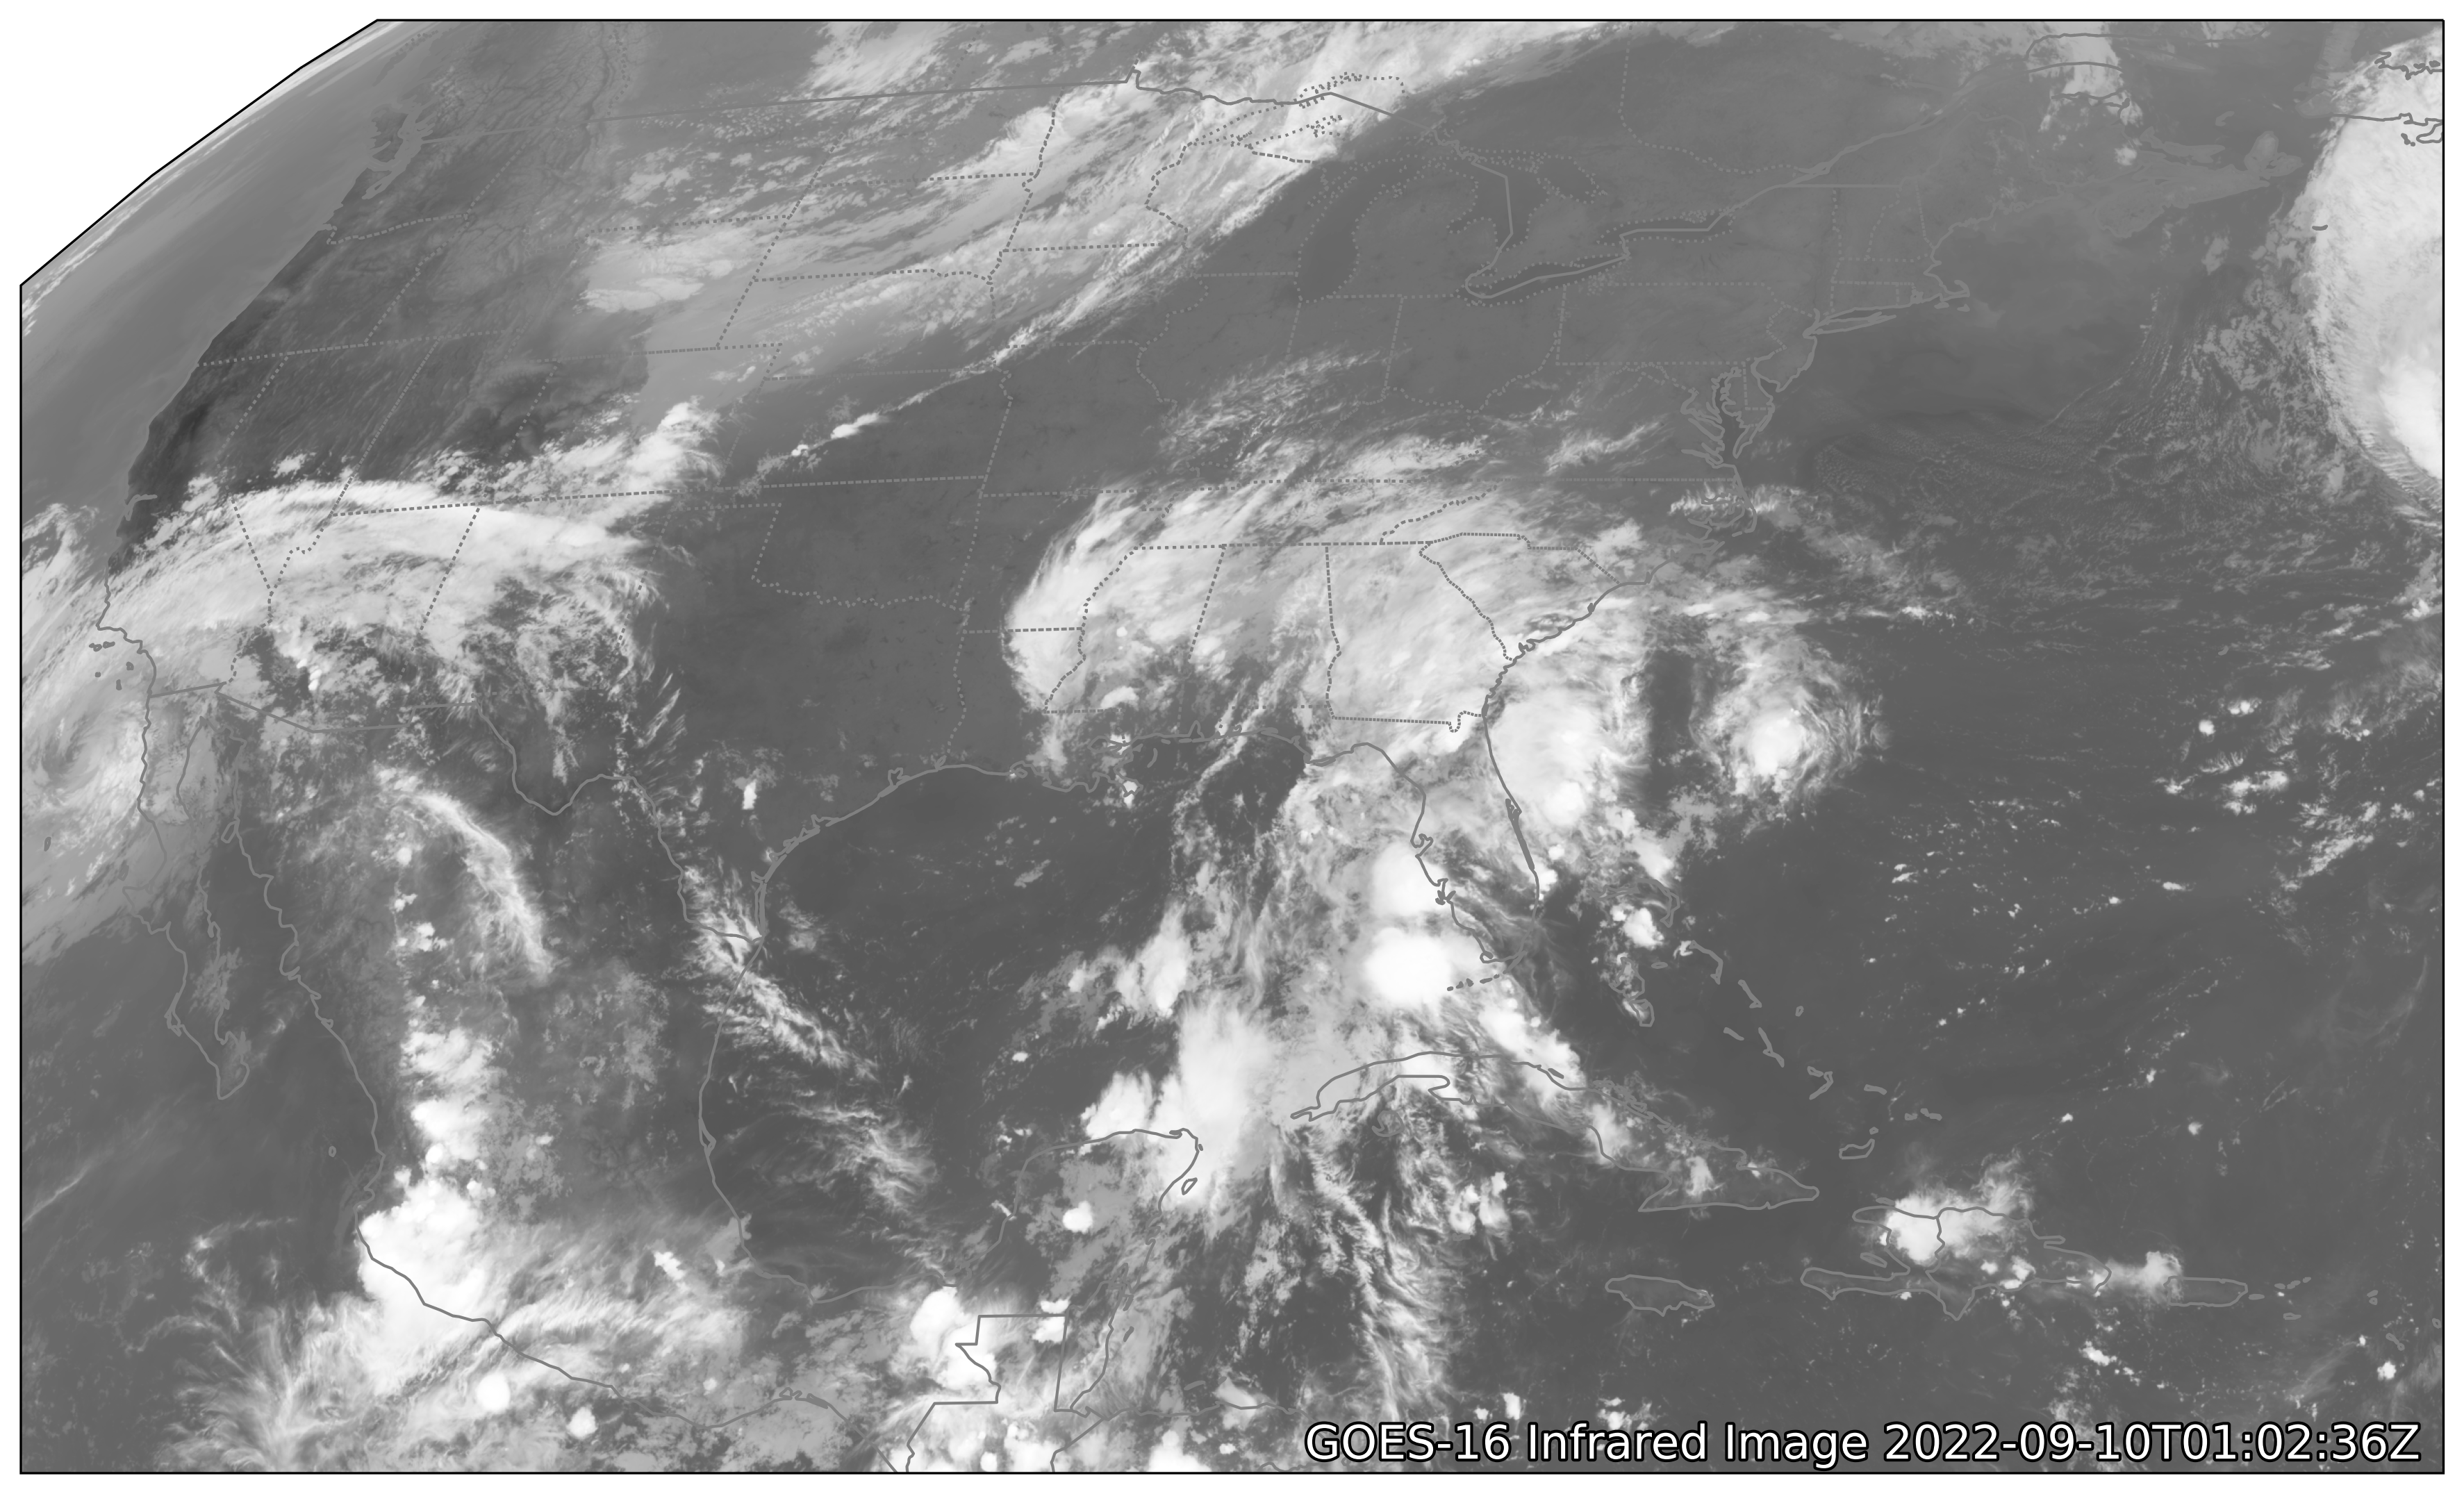

In [10]:
#here I create the figure.  Think of it as the sheet of paper that you are going to draw the map on. 
#I set the figure size to be 1500px X 1500 px and I set the resolution (dpi) to 300 dots per square inch.  A figure dpi of 300 is standard for publications.
#plt.figure(figsize = (the size of the figure), dpi = the figure resolution)
fig = plt.figure(figsize=(15, 15), dpi=300)

#We now need to set what projection we are plotting our map on.  Here we pass on the data we parsed out before.
#this function allows us to have multiple maps with plots in our figure but here we only need 1.
#fig.add_subplot(# plot rows, # plot columns, the current plot id, projection = the map projection for the plot)
#the function outputs a blank map plot which I save to ax.
ax = fig.add_subplot(1, 1, 1, projection=proj)

#We now need reference data to know where exactly the clouds are.  Here I add the coastlines, states, and country boarders.  
#I also specify that I want the various boarders to have a resolution of 50 meters, with a linewidth of 1, and a line color of grey.  Line color is called edgecolor here 
#because it is possible to fill the entire area that is within the boarder with a color.
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1, edgecolor = 'grey')
#for the states to make them stand out, I used the dotted linestyle
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':',linewidth = 1, edgecolor='grey')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='grey')

#this is the actual plot function for the satellite data. (.imshow)
#we pass the satellite dataset in.  It can find the variables it needs within the dataset.  
#We also set to extent to be the full extent.  If this wasn't here, there would be extra area in the map that we don't have an image for
#We also pass what colormap we want and what range that color map should be set to.  We set this up earlier
im = ax.imshow(data, extent=(x.min(), x.max(), y.min(), y.max()), origin='upper', cmap=color_map, norm=color_range)

#This next line gets the time that the satellite image is valid for from the data file.  This is setup to parse the date in the format it is in, in the datafile.
#datetime.strptime is used for parsing the datetime.  The datetime I pass in comes from the satellite data (data), and I tell python to take out the time variable (.t) 
#and then get the value contained in that variable (.values).  I then use the string function to make sure the time variable is a string so the datetime parser can work and I remove the last three characters since
#satellite data has a very actuate time stamp that has the seconds to 9 decimal places.  Python can only handle 6 decimal places and thus we just get rid of the last three decimal places.
start_time = datetime.strptime(str(data.t.values)[:-3], 
                               '%Y-%m-%dT%H:%M:%S.%f') #this tells the function how to decode the datetime.  Each % then the letter after, tells the function what 
                                                       #number of the date is located in that part of the string we are decoding the datetime for.  See Lab 1 appendix
                                                       #for what each % and letter combination stands for

#I now insert the time the satellite image is valid for into the image
#add_timestep(the plot variable, the datetime that the image is for, extra information for before the timestamp, should the text coloring be high contract, font size, vertical position of the text in the plot)

add_timestamp(ax, time=start_time, pretext='GOES-16 Infrared Image ',
              high_contrast=True, fontsize=16, y=0.01)

#finally I tell python to display the image created.
plt.show()

<br /><br />

You have now completed part II of the python portion of the lab.  Be sure to submit the fully rendered Jupyter Notebook on GitHub when you are finished.
